In [28]:
import cv2
from skimage import feature as detector
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import os
import glob
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
import random
import shutil
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
import re

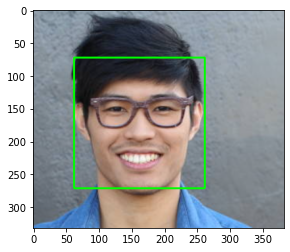

In [2]:
# Load the image
img = cv2.imread('./img/pic3.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the face detection cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
# for (x, y, w, h) in faces:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
x, y, w, h = faces[0]
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

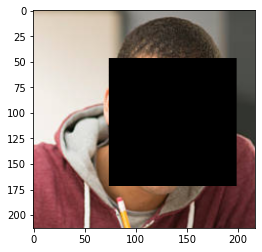

In [3]:

# Load the input image
image = cv2.imread('./img/pic4.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=10)

# If a face is detected, extract the region of interest (ROI)

x, y, w, h = faces[0]
roi = image[y:y+h, x:x+w]


# Create a mask of the ROI
mask = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
mask[mask > 0] = 0

# Apply the mask to the ROI and create a new image
result = cv2.bitwise_and(roi, roi, mask=mask)

# Replace the ROI with the new image in the original image
image[y:y+h, x:x+w] = result

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [4]:
def detect_faces(image):

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the face cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Extract the face pixels
    x, y, w, h = faces[0]
    face_pixels = image[y:y+h, x:x+w]
#     face_pixels = []
#     for (x, y, w, h) in faces:
#         face_pixels.extend(image[y:y+h, x:x+w].reshape(-1, 3))

    return face_pixels


In [5]:
def preprocess_image(img):
    
    # Convert to grayscale if necessary
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    

    
    
    # Apply Gaussian blur to remove noise
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Apply adaptive thresholding to binarize image
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    

    
    return thresh


In [6]:
def detect_faces(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the face cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Extract the face pixels
    face_pixels = []
    x, y, w, h = faces[0]
    face_pixels.append(image[y:y+h, x:x+w])
    
#     face_pixels = []
#     for (x, y, w, h) in faces:
#         face_pixels.append(image[y:y+h, x:x+w])

    # Combine the face pixels into a single image
    if len(face_pixels) > 0:
        face_image = np.concatenate(face_pixels, axis=1)
    else:
        face_image = np.zeros((1,1,3), np.uint8)

    return face_image


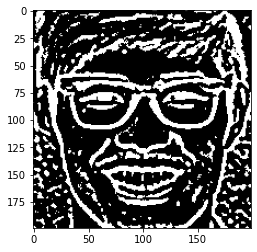

In [7]:

# Detect faces and extract face pixels
face_pixels = detect_faces('./img/pic3.png')


# # Show the face image
# plt.imshow(face_pixels)
# plt.show()
im = preprocess_image(face_pixels)


# Show the face image
# Show the image in grayscale
plt.imshow(im, cmap='gray')
plt.show()

In [8]:

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

# To capture video from webcam.
cap = cv2.VideoCapture(0)

# To use a video file as input
# cap = cv2.VideoCapture('filename.mp4')

# Loop through the frames
while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # Display
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()


In [9]:
# # Path to the directory containing the images
# image_dir = './img/'

# # Path to the directory where the test images will be saved
# test_dir = './test_images/'

# # Get a list of all image file names in the directory
# image_files = os.listdir(image_dir)

# # Shuffle the list of image file names randomly
# random.shuffle(image_files)

# # Select the first 10 images as test images
# test_files = image_files[:10]

# # Create the test directory if it doesn't exist
# os.makedirs(test_dir, exist_ok=True)

# # Iterate over the test image files and copy them to the test directory
# for image_file in test_files:
#     # Get the full path of the image file
#     image_path = os.path.join(image_dir, image_file)
    
#     # Get the label (image name) without the file extension
#     label = os.path.splitext(image_file)[0]
    
#     # Define the new file name for the test image
#     new_filename = label + '.jpg'
    
#     # Define the full path of the test image file
#     new_filepath = os.path.join(test_dir, new_filename)
    
#     # Copy the test image file to the test directory
#     shutil.copy(image_path, new_filepath)
    



# Load Dataset

In [10]:
def load_image_dataset(directory):
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')


    # List of image file extensions to read
    image_exts = ['jpg', 'jpeg', 'png', 'bmp']
    i=0
    # Detect faces in all images in the directory
    faces_list = []
    label = []
    for ext in image_exts:
        for filename in glob.glob(os.path.join(directory, f'*.{ext}')):
            temp = os.path.splitext(os.path.basename(filename))[0]
            i = i+1
    #         print(i,'read image :',temp)
            img = cv2.imread(filename)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
            x, y, w, h = faces[0]
            face = img[y:y+h, x:x+w]
            faces_list.append(face)
            label.append(temp)
            
    return faces_list,label
    
    

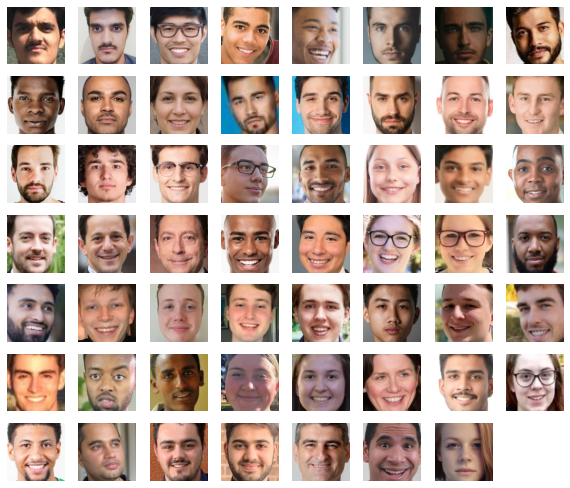

In [11]:
directory = './img'

faces_list,label = load_image_dataset(directory)

# Display the faces
if len(faces_list) > 0:
    fig = plt.figure(figsize=(10, 10))
    num_faces = len(faces_list)
    rows = cols = int(num_faces**0.5) + 1 if int(num_faces**0.5)**2 < num_faces else int(num_faces**0.5)
    for i, face in enumerate(faces_list):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')

    plt.show()
else:
    print('No faces detected in any images.')


# Preprocessing

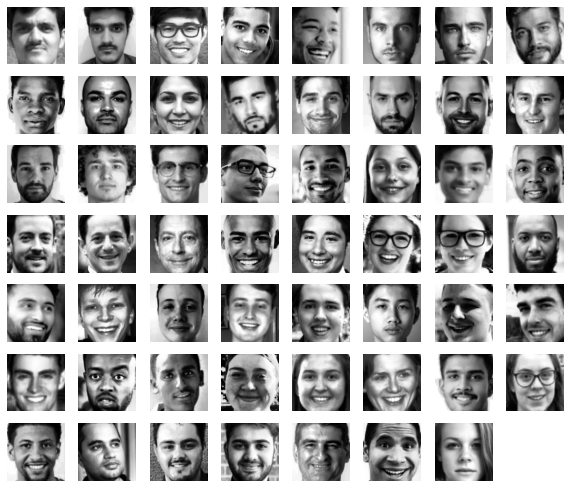

In [12]:

def preprocess(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply histogram equalization
    eq = cv2.equalizeHist(blur)

    return eq

def preprocess_images(images, target_size):
    preprocessed_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        preprocessed_image = preprocess(resized_image)
        preprocessed_images.append(preprocessed_image)
    return preprocessed_images

def display_images(images, preprocessed_images):
    # Display the faces
    if len(preprocessed_images) > 0:
        fig = plt.figure(figsize=(10, 10))
        num_faces = len(preprocessed_images)
        rows = cols = int(num_faces**0.5) + 1 if int(num_faces**0.5)**2 < num_faces else int(num_faces**0.5)
        for i, face in enumerate(preprocessed_images):
            fig.add_subplot(rows, cols, i+1)
            plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
            plt.axis('off')

        plt.show()
    else:
        print('No faces detected in any images.')

# Example usage
target_size = (224, 224) 
preprocessed_face_images = preprocess_images(faces_list,target_size)
display_images(faces_list, preprocessed_face_images)


# Features Extraction

In [14]:
def extract_image_features(preprocessed_face_images):
    hog = cv2.HOGDescriptor()
    hog_features = []

    for im in preprocessed_face_images:
        if im.shape[0] < 8 or im.shape[1] < 8:
            continue  # Skip images that are smaller than the cell size

        try:
            features = detector.hog(im, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(8, 8))
            hog_features.append(features)
        except ValueError:
            continue  # Skip images that cause a ValueError

    hog_features = np.array(hog_features)
    print(len(hog_features))
    
    return hog_features 
    

In [29]:
hog_features = extract_image_features(preprocessed_face_images)

hog_normalize = Normalizer(norm='l2')
hog_nor = hog_normalize.transform(hog_features)

55


# Split Data

In [16]:
#  data into training and testing sets
X_train = hog_features
y_train = label 


In [17]:
test_dir = './test_images/'
X_test,y_test = load_image_dataset(test_dir)
X_test = preprocess_images(X_test,target_size)
X_test = extract_image_features(X_test)

10


In [18]:
print("Length of Train dataset",len(X_train))
print("Length of Test dataset",len(X_test))

Length of Train dataset 55
Length of Test dataset 10


In [20]:

y_test = np.array([re.findall(r'\d+', item)[0] for item in y_test])

y_train = np.array([re.findall(r'\d+', item)[0] for item in y_train])


# Train Model

In [21]:
# Train an SVM classifier on the training data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict labels for the testing data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [22]:

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         1
          29       1.00      1.00      1.00         1
          34       1.00      1.00      1.00         1
          41       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         1
          49       1.00      1.00      1.00         1
          50       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



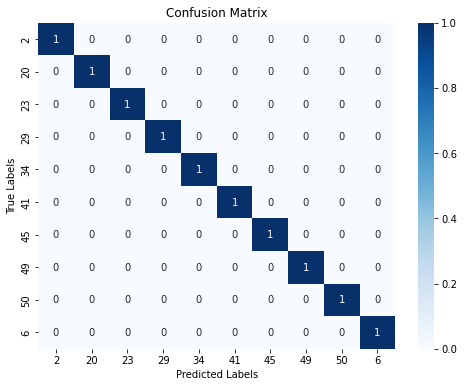

In [26]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axes
plt.figure(figsize=(8, 6))
ax = plt.subplot()

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(y_test)
ax.yaxis.set_ticklabels(y_pred)

# Show the plot
plt.show()
